# Analysis of US Presidential Election Data

This report presents analysis of US presidential election data for 2012 and 2016. 
The analysis is based on two spreadsheet datasets named *vote* and *data*. Both datasets are organized in a county-based manner meaning that every row includes information related to a specific county in US. The vote dataset includes number of votes for each of democrate and republican parties at each county in 2012 and 2016 elections. The data dataset includes census stats for each county including racial breakdown and economic status.

# Data cleaning

In this section *data* and *vote* datasets are inspected and cleaned.

## *Data* dataset

To prepare for data cleaning, overall data parameters is inspected. The shape of the *data* dataset is evaluated as:

In [1]:
import numpy as np
import pandas as pd
df_data = pd.read_csv('data.csv')
df_data.shape 

(3141, 54)

This dataset includes 3141 rows corresponding to the number of counties in US and 54 columns of census information about these counties. A view of top 5 rows of this dataset are generated as follows:

In [2]:
pd.options.display.max_columns = 100
df_data.head()

,State,ST,Fips,County,Precincts,Votes,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors's Degree,Graduate Degree,School Enrollment,Median Earnings 2010,White (Not Latino) Population,African American Population,Native American Population,Asian American Population,Other Race or Races,Latino Population,Children Under 6 Living in Poverty,Adults 65 and Older Living in Poverty,Total Population,Preschool.Enrollment.Ratio.enrolled.ages.3.and.4,Poverty.Rate.below.federal.poverty.threshold,Gini.Coefficient,Child.Poverty.living.in.families.below.the.poverty.line,Management.professional.and.related.occupations,Service.occupations,Sales.and.office.occupations,Farming.fishing.and.forestry.occupations,Construction.extraction.maintenance.and.repair.occupations,Production.transportation.and.material.moving.occupations,White,Black,Hispanic,Asian,Amerindian,Other,White_Asian,SIRE_homogeneity,median_age,Low.birthweight,Teen.births,Children.in.single.parent.households,Adult.smoking,Adult.obesity,Diabetes,Sexually.transmitted.infections,HIV.prevalence.rate,Uninsured,Unemployment,Violent.crime,Homicide.rate,Injury.deaths,Infant.mortality
0,Arkansas,AR,5043,"Drew County, Arkansas",17.0,6590.0,19.4,80.6,19.4,5.7,78.5,21988.947300,67.90,27.95,0.15,0.55,0.85,2.65,34.15,14.40,18604,73.5,23.45,0.469,36.95,28.35,18.25,20.15,3.60,9.40,20.20,67.90,27.95,2.65,0.55,0.15,0.85,68.45,0.539968,36.8,0.10,47.7,0.429,0.181,0.323,0.126,747.3,79.9,0.197,0.108,449.02,NaN,82.0,NaN
1,Arkansas,AR,5087,"Madison County, Arkansas",20.0,6829.0,24.2,75.8,13.4,4.1,76.4,23365.948890,92.00,0.25,1.25,0.30,1.50,4.70,26.20,18.45,15597,43.8,18.20,0.446,25.15,25.15,16.85,19.55,2.90,16.20,19.40,92.00,0.25,4.70,0.30,1.25,1.50,92.30,0.849006,38.5,0.07,49.0,0.179,0.304,0.328,0.135,247.2,131.3,0.239,0.053,245.83,NaN,96.8,NaN
2,Georgia,GA,13159,"Jasper County, Georgia",3.0,6016.0,21.7,78.3,13.3,5.6,70.2,25363.060950,72.70,22.20,0.40,0.10,1.05,3.55,17.60,17.95,13744,36.5,18.05,0.451,27.60,21.60,17.15,22.60,4.35,15.10,19.25,72.70,22.20,3.55,0.10,0.40,1.05,72.80,0.579201,38.1,0.09,54.1,0.381,0.210,0.298,0.118,324.1,402.4,0.239,0.096,205.60,NaN,71.6,NaN
3,Colorado,CO,8037,"Eagle County, Colorado",30.0,22611.0,12.8,87.2,45.9,11.7,64.1,35484.543175,68.40,0.30,0.25,1.15,1.10,28.90,11.65,4.85,51405,50.7,9.40,0.464,12.05,32.90,24.80,20.05,0.45,15.50,6.30,68.40,0.30,28.90,1.15,0.25,1.10,69.55,0.551646,33.4,0.09,41.3,0.204,0.095,0.132,0.036,190.9,133.7,0.230,0.081,123.88,NaN,42.9,3.5
4,Georgia,GA,13091,"Dodge County, Georgia",16.0,6995.0,23.1,76.9,13.8,4.8,61.5,26927.608255,66.15,29.80,0.15,0.45,0.65,2.80,20.65,20.60,20745,41.5,21.15,0.464,23.70,26.15,20.05,22.00,1.60,11.35,18.85,66.15,29.80,2.80,0.45,0.15,0.65,66.60,0.527235,37.7,0.12,64.0,0.453,0.189,0.358,0.153,497.9,315.8,0.208,0.115,477.48,8.11,79.4,NaN


In [44]:
At the first glance, it can be seen that the table involves two columns related
to the states (i.e., *State* and *ST*). Therefore, one of these columns can be 
removed. As a Canadian, abbreviations of US state names does not make much sense,
so it can be a good candidate for removal; however, number of distinct items in 
each of these columns are evaluated to ensure that the column with most 

SyntaxError: invalid syntax (<ipython-input-44-ee25f0b00fc2>, line 1)

Data type of each column as well as number of non-null values in each is retrieved as:

In [3]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3141 entries, 0 to 3140
Data columns (total 54 columns):
State                                                         3141 non-null object
ST                                                            3140 non-null object
Fips                                                          3141 non-null int64
County                                                        3141 non-null object
Precincts                                                     3109 non-null float64
Votes                                                         3109 non-null float64
Less Than High School Diploma                                 3141 non-null float64
At Least High School Diploma                                  3141 non-null float64
At Least Bachelors's Degree                                   3141 non-null float64
Graduate Degree                                               3141 non-null float64
School Enrollment                                         

Except for *State* and *County* columns, all others are in *float* format. 
Furthermore, many columns include null values (e.g., Precinct, Votes, etc.)

In [4]:
df_data[['State','ST', 'Fips','County', 'Precincts']].nunique()

State          51
ST             51
Fips         3141
County       3141
Precincts     303
dtype: int64

In [5]:
df_data.describe()

,Fips,Precincts,Votes,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors's Degree,Graduate Degree,School Enrollment,Median Earnings 2010,White (Not Latino) Population,African American Population,Native American Population,Asian American Population,Other Race or Races,Latino Population,Children Under 6 Living in Poverty,Adults 65 and Older Living in Poverty,Total Population,Preschool.Enrollment.Ratio.enrolled.ages.3.and.4,Poverty.Rate.below.federal.poverty.threshold,Gini.Coefficient,Child.Poverty.living.in.families.below.the.poverty.line,Management.professional.and.related.occupations,Service.occupations,Sales.and.office.occupations,Farming.fishing.and.forestry.occupations,Construction.extraction.maintenance.and.repair.occupations,Production.transportation.and.material.moving.occupations,White,Black,Hispanic,Asian,Amerindian,Other,White_Asian,SIRE_homogeneity,median_age,Low.birthweight,Teen.births,Children.in.single.parent.households,Adult.smoking,Adult.obesity,Diabetes,Sexually.transmitted.infections,HIV.prevalence.rate,Uninsured,Unemployment,Violent.crime,Homicide.rate,Injury.deaths,Infant.mortality
count,3141.00000,3109.000000,3.109000e+03,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3.141000e+03,3133.000000,3141.000000,3141.00000,3140.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,2914.000000,3042.000000,3134.000000,2706.000000,3136.000000,3136.000000,2952.000000,2320.000000,3135.000000,3135.000000,2953.000000,1251.000000,2844.000000,1414.000000
mean,30406.52149,54.940495,4.178247e+04,16.874514,83.045893,19.013419,6.449682,74.953932,25463.387576,78.778908,8.752642,1.819596,1.106129,1.637822,7.904760,24.818609,11.468386,9.711190e+04,43.063837,15.447246,0.43144,21.091720,29.855237,17.443235,22.828797,2.116237,11.521665,16.235721,78.778908,8.752642,7.904760,1.106129,1.819596,1.637822,79.885037,0.717665,39.862846,0.083493,44.406345,0.315941,0.212722,0.305523,0.107103,354.269682,174.590733,0.179860,0.077045,257.055923,6.285803,76.112553,7.737553
std,15156.09339,172.926255,1.134574e+05,7.349563,7.533330,8.646941,3.849162,5.261211,5078.837873,19.625220,14.384847,7.418349,2.435244,1.901044,12.955106,11.889270,5.479738,3.111593e+05,14.526151,6.384713,0.03661,9.569136,6.432767,3.514847,3.484825,2.595179,3.370997,6.114629,19.625220,14.384847,12.955106,2.435244,7.418349,1.901044,19.132100,0.185027,4.922651,0.021065,20.039650,0.103104,0.063096,0.042426,0.022529,273.108568,229.263418,0.054765,0.027680,207.563047,4.659909,24.604878,2.511056
min,1001.00000,1.000000,6.400000e+01,0.700000,29.900000,3.700000,0.000000,0.000000,0.000000,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.100000e+01,0.000000,0.000000,0.20700,0.000000,9.050000,0.000000,5.400000,0.000000,0.000000,1.300000,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,2.650000,0.227734,18.000000,0.030000,4.100000,0.000000,0.031000,0.131000,0.033000,37.400000,11.000000,0.031000,0.008000,0.000000,0.610000,23.300000,2.600000
25%,18181.00000,11.000000,4.847000e+03,11.400000,78.400000,13.100000,4.000000,72.300000,22332.413650,67.700000,0.400000,0.200000,0.250000,0.900000,1.450000,16.400000,7.600000,1.103000e+04,34.700000,11.000000,0.40700,14.150000,25.500000,15.200000,20.750000,0.550000,9.250000,11.650000,67.700000,0.400000,1.450000,0.250000,0.200000,0.900000,69.450000,0.543010,37.100000,0.070000,29.000000,0.248250,0.170000,0.283000,0.092000,182.550000,59.800000,0.140000,0.058000,114.620000,3.195000,59.300000,6.100000
50%,29179.00000,20.000000,1.094800e+04,15.400000,84.600000,16.900000,5.300000,75.150000,24830.888890,86.350000,1.900000,0.300000,0.450000,1.300000,2.950000,23.750000,10.250000,2.563100e+04,43.200000,14.650000,0.42900,20.200000,28.800000,17.150000,23.000000,1.

In [6]:
df_vote = pd.read_csv('votes.csv')
df_vote.shape

(3141, 6)

In [7]:
df_vote = pd.read_csv('votes.csv')
df_vote.head()

,Unnamed: 0,Democrats_12(Votes),Republicans_12(Votes),Democrats_16(Votes),Republicans_16(Votes),Fips
0,0,2630.0,3887.0,2364.0,3967.0,5043
1,1,2099.0,4263.0,1587.0,4917.0,5087
2,2,1845.0,4136.0,1544.0,4353.0,13159
3,3,12792.0,9411.0,12652.0,8153.0,8037
4,4,2442.0,5214.0,1836.0,5021.0,13091


In [8]:
df_vote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3141 entries, 0 to 3140
Data columns (total 6 columns):
Unnamed: 0               3141 non-null int64
Democrats_12(Votes)      3110 non-null float64
Republicans_12(Votes)    3110 non-null float64
Democrats_16(Votes)      3109 non-null float64
Republicans_16(Votes)    3109 non-null float64
Fips                     3141 non-null int64
dtypes: float64(4), int64(2)
memory usage: 147.4 KB


In [9]:
df_vote.describe()

,Unnamed: 0,Democrats_12(Votes),Republicans_12(Votes),Democrats_16(Votes),Republicans_16(Votes),Fips
count,3141.000000,3.110000e+03,3110.000000,3.109000e+03,3109.000000,3141.00000
mean,1570.000000,2.114973e+04,19532.321222,2.007697e+04,19634.384046,30406.52149
std,906.872924,7.425758e+04,44795.765395,7.203087e+04,40459.435551,15156.09339
min,0.000000,5.000000e+00,54.000000,4.000000e+00,57.000000,1001.00000
25%,785.000000,1.556750e+03,2918.750000,1.166000e+03,3208.000000,18181.00000
50%,1570.000000,3.999000e+03,6450.500000,3.155000e+03,7169.000000,29179.00000
75%,2355.000000,1.138100e+04,16315.250000,9.610000e+03,17446.000000,45083.00000
max,3140.000000,2.216903e+06,885333.000000,1.893770e+06,620285.000000,56045.00000


In [10]:
df_data.describe()[['White (Not Latino) Population', 'White', 'African American Population', 'Black', 'Asian American Population', 'Asian', 'Latino Population', 'Hispanic']]

,White (Not Latino) Population,White,African American Population,Black,Asian American Population,Asian,Latino Population,Hispanic
count,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000
mean,78.778908,78.778908,8.752642,8.752642,1.106129,1.106129,7.904760,7.904760
std,19.625220,19.625220,14.384847,14.384847,2.435244,2.435244,12.955106,12.955106
min,2.500000,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,67.700000,67.700000,0.400000,0.400000,0.250000,0.250000,1.450000,1.450000
50%,86.350000,86.350000,1.900000,1.900000,0.450000,0.450000,2.950000,2.950000
75%,94.300000,94.300000,9.900000,9.900000,1.000000,1.000000,7.800000,7.800000
max,99.200000,99.200000,86.100000,86.100000,42.700000,42.700000,97.150000,97.150000


In [11]:
df_data.fillna(df_data.mean())

,State,ST,Fips,County,Precincts,Votes,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors's Degree,Graduate Degree,School Enrollment,Median Earnings 2010,White (Not Latino) Population,African American Population,Native American Population,Asian American Population,Other Race or Races,Latino Population,Children Under 6 Living in Poverty,Adults 65 and Older Living in Poverty,Total Population,Preschool.Enrollment.Ratio.enrolled.ages.3.and.4,Poverty.Rate.below.federal.poverty.threshold,Gini.Coefficient,Child.Poverty.living.in.families.below.the.poverty.line,Management.professional.and.related.occupations,Service.occupations,Sales.and.office.occupations,Farming.fishing.and.forestry.occupations,Construction.extraction.maintenance.and.repair.occupations,Production.transportation.and.material.moving.occupations,White,Black,Hispanic,Asian,Amerindian,Other,White_Asian,SIRE_homogeneity,median_age,Low.birthweight,Teen.births,Children.in.single.parent.households,Adult.smoking,Adult.obesity,Diabetes,Sexually.transmitted.infections,HIV.prevalence.rate,Uninsured,Unemployment,Violent.crime,Homicide.rate,Injury.deaths,Infant.mortality
0,Arkansas,AR,5043,"Drew County, Arkansas",17.0,6590.0,19.4,80.6,19.4,5.7,78.50,21988.947300,67.90,27.95,0.15,0.55,0.85,2.65,34.15,14.40,18604,73.5,23.45,0.469,36.95,28.35,18.25,20.15,3.60,9.40,20.20,67.90,27.95,2.65,0.55,0.15,0.85,68.45,0.539968,36.8,0.100000,47.7,0.429,0.181000,0.323,0.126,747.300000,79.900000,0.197,0.108,449.02,6.285803,82.000000,7.737553
1,Arkansas,AR,5087,"Madison County, Arkansas",20.0,6829.0,24.2,75.8,13.4,4.1,76.40,23365.948890,92.00,0.25,1.25,0.30,1.50,4.70,26.20,18.45,15597,43.8,18.20,0.446,25.15,25.15,16.85,19.55,2.90,16.20,19.40,92.00,0.25,4.70,0.30,1.25,1.50,92.30,0.849006,38.5,0.070000,49.0,0.179,0.304000,0.328,0.135,247.200000,131.300000,0.239,0.053,245.83,6.285803,96.800000,7.737553
2,Georgia,GA,13159,"Jasper County, Georgia",3.0,6016.0,21.7,78.3,13.3,5.6,70.20,25363.060950,72.70,22.20,0.40,0.10,1.05,3.55,17.60,17.95,13744,36.5,18.05,0.451,27.60,21.60,17.15,22.60,4.35,15.10,19.25,72.70,22.20,3.55,0.10,0.40,1.05,72.80,0.579201,38.1,0.090000,54.1,0.381,0.210000,0.298,0.118,324.100000,402.400000,0.239,0.096,205.60,6.285803,71.600000,7.737553
3,Colorado,CO,8037,"Eagle County, Colorado",30.0,22611.0,12.8,87.2,45.9,11.7,64.10,35484.543175,68.40,0.30,0.25,1.15,1.10,28.90,11.65,4.85,51405,50.7,9.40,0.464,12.05,32.90,24.80,20.05,0.45,15.50,6.30,68.40,0.30,28.90,1.15,0.25,1.10,69.55,0.551646,33.4,0.090000,41.3,0.204,0.095000,0.132,0.036,190.900000,133.700000,0.230,0.081,123.88,6.285803,42.900000,3.500000
4,Georgia,GA,13091,"Dodge County, Georgia",16.0,6995.0,23.1,76.9,13.8,4.8,61.50,26927.608255,66.15,29.80,0.15,0.45,0.65,2.80,20.65,20.60,20745,41.5,21.15,0.464,23.70,26.15,20.05,22.00,1.60,11.35,18.85,66.15,29.80,2.80,0.45,0.15,0.65,66.60,0.527235,37.7,0.120000,64.0,0.453,0.189000,0.358,0.153,497.900000,315.800000,0.208,0.115,477.48,8.110000,79.400000,7.737553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,Ohio,OH,39017,"Butler County, Ohio",282.0,168422.0,13.2,86.8,25.9,9.5,79.95,29687.650475,85.65,6.85,0.20,2.20,1.80,3.35,19.15,6.80,362504,49.8,12.75,0.427,16.05,33.85,16.40,26.60,0.15,8.45,14.60,85.65,6.85,3.35,2.20,0.20,1.80,87.85,0.740219,35.7,0.080000,35.8,0.303,0.227000,0.298,0.104,302.200000,84.200000,0.129,0.071,339.05,2.940000,55.000000,8.000000
3137,Ohio,OH,39091,"Logan County, Ohio",38.0,21007.0,14.1,85.9,14.3,5.2,73.40,27308.285080,94.70,1.45,0.20,0.60,2.00,1.05,28.25,7.50,46144,31.7,14.00,0.413,23.55,26.05,15.10,21.85,0.60,8.95,27.45,94.70,1.45,1.05,0.60,0.20,2.00,95.30,0.897570,38.9,0.080000,44.0,0.353,0.218000,0.297,0.127,238.600000,44.200000,0.136,0.067,133.96,3.100000,72.600000,8.200000
3138,Ohio,OH,39093,"Lorain County, Ohio",188.0,136654.0,11.5,88.5,20.6,7.6,78.85,28555.70

In [12]:
df_data.drop(['ST', 'White (Not Latino) Population', 'African American Population', 'Asian American Population', 'Latino Population', 'HIV.prevalence.rate','Homicide.rate','Infant.mortality'], axis = 1, inplace = True)

In [13]:
df_data.shape

(3141, 46)

In [14]:
df_vote.drop(['Unnamed: 0'], axis = 1, inplace = True)
display(df_vote)

,Democrats_12(Votes),Republicans_12(Votes),Democrats_16(Votes),Republicans_16(Votes),Fips
0,2630.0,3887.0,2364.0,3967.0,5043
1,2099.0,4263.0,1587.0,4917.0,5087
2,1845.0,4136.0,1544.0,4353.0,13159
3,12792.0,9411.0,12652.0,8153.0,8037
4,2442.0,5214.0,1836.0,5021.0,13091
...,...,...,...,...,...
3136,62388.0,105176.0,56700.0,104441.0,39017
3137,7062.0,13633.0,4537.0,15586.0,39091
3138,81464.0,59405.0,64958.0,65346.0,39093
3139,6144.0,8162.0,5455.0,9992.0,40021


In [15]:
np.mean(df_data.isna(),axis=0)*100

State                                                          0.000000
Fips                                                           0.000000
County                                                         0.000000
Precincts                                                      1.018784
Votes                                                          1.018784
Less Than High School Diploma                                  0.000000
At Least High School Diploma                                   0.000000
At Least Bachelors's Degree                                    0.000000
Graduate Degree                                                0.000000
School Enrollment                                              0.000000
Median Earnings 2010                                           0.000000
Native American Population                                     0.000000
Other Race or Races                                            0.000000
Children Under 6 Living in Poverty                             0

In [16]:
df_data.mean()

Fips                                                          30406.521490
Precincts                                                        54.940495
Votes                                                         41782.466388
Less Than High School Diploma                                    16.874514
At Least High School Diploma                                     83.045893
At Least Bachelors's Degree                                      19.013419
Graduate Degree                                                   6.449682
School Enrollment                                                74.953932
Median Earnings 2010                                          25463.387576
Native American Population                                        1.819596
Other Race or Races                                               1.637822
Children Under 6 Living in Poverty                               24.818609
Adults 65 and Older Living in Poverty                            11.468386
Total Population         

In [17]:
df_data.fillna(df_data.mean())

,State,Fips,County,Precincts,Votes,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors's Degree,Graduate Degree,School Enrollment,Median Earnings 2010,Native American Population,Other Race or Races,Children Under 6 Living in Poverty,Adults 65 and Older Living in Poverty,Total Population,Preschool.Enrollment.Ratio.enrolled.ages.3.and.4,Poverty.Rate.below.federal.poverty.threshold,Gini.Coefficient,Child.Poverty.living.in.families.below.the.poverty.line,Management.professional.and.related.occupations,Service.occupations,Sales.and.office.occupations,Farming.fishing.and.forestry.occupations,Construction.extraction.maintenance.and.repair.occupations,Production.transportation.and.material.moving.occupations,White,Black,Hispanic,Asian,Amerindian,Other,White_Asian,SIRE_homogeneity,median_age,Low.birthweight,Teen.births,Children.in.single.parent.households,Adult.smoking,Adult.obesity,Diabetes,Sexually.transmitted.infections,Uninsured,Unemployment,Violent.crime,Injury.deaths
0,Arkansas,5043,"Drew County, Arkansas",17.0,6590.0,19.4,80.6,19.4,5.7,78.50,21988.947300,0.15,0.85,34.15,14.40,18604,73.5,23.45,0.469,36.95,28.35,18.25,20.15,3.60,9.40,20.20,67.90,27.95,2.65,0.55,0.15,0.85,68.45,0.539968,36.8,0.100000,47.7,0.429,0.181000,0.323,0.126,747.300000,0.197,0.108,449.02,82.000000
1,Arkansas,5087,"Madison County, Arkansas",20.0,6829.0,24.2,75.8,13.4,4.1,76.40,23365.948890,1.25,1.50,26.20,18.45,15597,43.8,18.20,0.446,25.15,25.15,16.85,19.55,2.90,16.20,19.40,92.00,0.25,4.70,0.30,1.25,1.50,92.30,0.849006,38.5,0.070000,49.0,0.179,0.304000,0.328,0.135,247.200000,0.239,0.053,245.83,96.800000
2,Georgia,13159,"Jasper County, Georgia",3.0,6016.0,21.7,78.3,13.3,5.6,70.20,25363.060950,0.40,1.05,17.60,17.95,13744,36.5,18.05,0.451,27.60,21.60,17.15,22.60,4.35,15.10,19.25,72.70,22.20,3.55,0.10,0.40,1.05,72.80,0.579201,38.1,0.090000,54.1,0.381,0.210000,0.298,0.118,324.100000,0.239,0.096,205.60,71.600000
3,Colorado,8037,"Eagle County, Colorado",30.0,22611.0,12.8,87.2,45.9,11.7,64.10,35484.543175,0.25,1.10,11.65,4.85,51405,50.7,9.40,0.464,12.05,32.90,24.80,20.05,0.45,15.50,6.30,68.40,0.30,28.90,1.15,0.25,1.10,69.55,0.551646,33.4,0.090000,41.3,0.204,0.095000,0.132,0.036,190.900000,0.230,0.081,123.88,42.900000
4,Georgia,13091,"Dodge County, Georgia",16.0,6995.0,23.1,76.9,13.8,4.8,61.50,26927.608255,0.15,0.65,20.65,20.60,20745,41.5,21.15,0.464,23.70,26.15,20.05,22.00,1.60,11.35,18.85,66.15,29.80,2.80,0.45,0.15,0.65,66.60,0.527235,37.7,0.120000,64.0,0.453,0.189000,0.358,0.153,497.900000,0.208,0.115,477.48,79.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,Ohio,39017,"Butler County, Ohio",282.0,168422.0,13.2,86.8,25.9,9.5,79.95,29687.650475,0.20,1.80,19.15,6.80,362504,49.8,12.75,0.427,16.05,33.85,16.40,26.60,0.15,8.45,14.60,85.65,6.85,3.35,2.20,0.20,1.80,87.85,0.740219,35.7,0.080000,35.8,0.303,0.227000,0.298,0.104,302.200000,0.129,0.071,339.05,55.000000
3137,Ohio,39091,"Logan County, Ohio",38.0,21007.0,14.1,85.9,14.3,5.2,73.40,27308.285080,0.20,2.00,28.25,7.50,46144,31.7,14.00,0.413,23.55,26.05,15.10,21.85,0.60,8.95,27.45,94.70,1.45,1.05,0.60,0.20,2.00,95.30,0.897570,38.9,0.080000,44.0,0.353,0.218000,0.297,0.127,238.600000,0.136,0.067,133.96,72.600000
3138,Ohio,39093,"Lorain County, Ohio",188.0,136654.0,11.5,88.5,20.6,7.6,78.85,28555.704445,0.25,2.15,24.25,8.30,302083,51.2,12.85,0.423,19.80,31.00,17.20,25.40,0.30,8.40,17.80,80.80,7.95,8.05,0.90,0.25,2.15,81.70,0.666214,39.5,0.080000,34.8,0.357,0.214000,0.314,0.116,387.600000,0.131,0.077,266.27,46.300000
3139,Oklahoma,40021,"Cherokee County, Oklahoma",24.0,16487.0,16.1,83.9,23.8,8.8,73.45,19592.309205,31.10,8.40,46.20,14.00,46114,42.7,26.55,0.452,34.95,31.55,18.25,24.25,2.60,12.55,10.85,51.95,1.55,6.35,0.60,31.10,8.40,52.55,0.377966,34.1,0.080000,49.7,0.377,0.263000,0.352,0.116,365.800000,0.277,0.053,184.60,91.400000


In [18]:
np.mean(df_vote.isna(),axis=0)*100

Democrats_12(Votes)      0.986947
Republicans_12(Votes)    0.986947
Democrats_16(Votes)      1.018784
Republicans_16(Votes)    1.018784
Fips                     0.000000
dtype: float64

In [19]:

df_data.fillna(method = 'bfill', inplace = True)
df_data

,State,Fips,County,Precincts,Votes,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors's Degree,Graduate Degree,School Enrollment,Median Earnings 2010,Native American Population,Other Race or Races,Children Under 6 Living in Poverty,Adults 65 and Older Living in Poverty,Total Population,Preschool.Enrollment.Ratio.enrolled.ages.3.and.4,Poverty.Rate.below.federal.poverty.threshold,Gini.Coefficient,Child.Poverty.living.in.families.below.the.poverty.line,Management.professional.and.related.occupations,Service.occupations,Sales.and.office.occupations,Farming.fishing.and.forestry.occupations,Construction.extraction.maintenance.and.repair.occupations,Production.transportation.and.material.moving.occupations,White,Black,Hispanic,Asian,Amerindian,Other,White_Asian,SIRE_homogeneity,median_age,Low.birthweight,Teen.births,Children.in.single.parent.households,Adult.smoking,Adult.obesity,Diabetes,Sexually.transmitted.infections,Uninsured,Unemployment,Violent.crime,Injury.deaths
0,Arkansas,5043,"Drew County, Arkansas",17.0,6590.0,19.4,80.6,19.4,5.7,78.50,21988.947300,0.15,0.85,34.15,14.40,18604,73.5,23.45,0.469,36.95,28.35,18.25,20.15,3.60,9.40,20.20,67.90,27.95,2.65,0.55,0.15,0.85,68.45,0.539968,36.8,0.10,47.7,0.429,0.181,0.323,0.126,747.3,0.197,0.108,449.02,82.0
1,Arkansas,5087,"Madison County, Arkansas",20.0,6829.0,24.2,75.8,13.4,4.1,76.40,23365.948890,1.25,1.50,26.20,18.45,15597,43.8,18.20,0.446,25.15,25.15,16.85,19.55,2.90,16.20,19.40,92.00,0.25,4.70,0.30,1.25,1.50,92.30,0.849006,38.5,0.07,49.0,0.179,0.304,0.328,0.135,247.2,0.239,0.053,245.83,96.8
2,Georgia,13159,"Jasper County, Georgia",3.0,6016.0,21.7,78.3,13.3,5.6,70.20,25363.060950,0.40,1.05,17.60,17.95,13744,36.5,18.05,0.451,27.60,21.60,17.15,22.60,4.35,15.10,19.25,72.70,22.20,3.55,0.10,0.40,1.05,72.80,0.579201,38.1,0.09,54.1,0.381,0.210,0.298,0.118,324.1,0.239,0.096,205.60,71.6
3,Colorado,8037,"Eagle County, Colorado",30.0,22611.0,12.8,87.2,45.9,11.7,64.10,35484.543175,0.25,1.10,11.65,4.85,51405,50.7,9.40,0.464,12.05,32.90,24.80,20.05,0.45,15.50,6.30,68.40,0.30,28.90,1.15,0.25,1.10,69.55,0.551646,33.4,0.09,41.3,0.204,0.095,0.132,0.036,190.9,0.230,0.081,123.88,42.9
4,Georgia,13091,"Dodge County, Georgia",16.0,6995.0,23.1,76.9,13.8,4.8,61.50,26927.608255,0.15,0.65,20.65,20.60,20745,41.5,21.15,0.464,23.70,26.15,20.05,22.00,1.60,11.35,18.85,66.15,29.80,2.80,0.45,0.15,0.65,66.60,0.527235,37.7,0.12,64.0,0.453,0.189,0.358,0.153,497.9,0.208,0.115,477.48,79.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,Ohio,39017,"Butler County, Ohio",282.0,168422.0,13.2,86.8,25.9,9.5,79.95,29687.650475,0.20,1.80,19.15,6.80,362504,49.8,12.75,0.427,16.05,33.85,16.40,26.60,0.15,8.45,14.60,85.65,6.85,3.35,2.20,0.20,1.80,87.85,0.740219,35.7,0.08,35.8,0.303,0.227,0.298,0.104,302.2,0.129,0.071,339.05,55.0
3137,Ohio,39091,"Logan County, Ohio",38.0,21007.0,14.1,85.9,14.3,5.2,73.40,27308.285080,0.20,2.00,28.25,7.50,46144,31.7,14.00,0.413,23.55,26.05,15.10,21.85,0.60,8.95,27.45,94.70,1.45,1.05,0.60,0.20,2.00,95.30,0.897570,38.9,0.08,44.0,0.353,0.218,0.297,0.127,238.6,0.136,0.067,133.96,72.6
3138,Ohio,39093,"Lorain County, Ohio",188.0,136654.0,11.5,88.5,20.6,7.6,78.85,28555.704445,0.25,2.15,24.25,8.30,302083,51.2,12.85,0.423,19.80,31.00,17.20,25.40,0.30,8.40,17.80,80.80,7.95,8.05,0.90,0.25,2.15,81.70,0.666214,39.5,0.08,34.8,0.357,0.214,0.314,0.116,387.6,0.131,0.077,266.27,46.3
3139,Oklahoma,40021,"Cherokee County, Oklahoma",24.0,16487.0,16.1,83.9,23.8,8.8,73.45,19592.309205,31.10,8.40,46.20,14.00,46114,42.7,26.55,0.452,34.95,31.55,18.25,24.25,2.60,12.55,10.85,51.95,1.55,6.35,0.60,31.10,8.40,52.55,0.377966,34.1,0.08,49.7,0.377,0.263,0.352,0.116,365.8,0.277,0.053,184.60,91.4


In [20]:
np.mean(df_data.isna(),axis=0)*100

State                                                         0.000000
Fips                                                          0.000000
County                                                        0.000000
Precincts                                                     0.000000
Votes                                                         0.000000
Less Than High School Diploma                                 0.000000
At Least High School Diploma                                  0.000000
At Least Bachelors's Degree                                   0.000000
Graduate Degree                                               0.000000
School Enrollment                                             0.000000
Median Earnings 2010                                          0.000000
Native American Population                                    0.000000
Other Race or Races                                           0.000000
Children Under 6 Living in Poverty                            0.000000
Adults

In [21]:
df_data.fillna(method = 'ffill', inplace = True)
display(df_data)

,State,Fips,County,Precincts,Votes,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors's Degree,Graduate Degree,School Enrollment,Median Earnings 2010,Native American Population,Other Race or Races,Children Under 6 Living in Poverty,Adults 65 and Older Living in Poverty,Total Population,Preschool.Enrollment.Ratio.enrolled.ages.3.and.4,Poverty.Rate.below.federal.poverty.threshold,Gini.Coefficient,Child.Poverty.living.in.families.below.the.poverty.line,Management.professional.and.related.occupations,Service.occupations,Sales.and.office.occupations,Farming.fishing.and.forestry.occupations,Construction.extraction.maintenance.and.repair.occupations,Production.transportation.and.material.moving.occupations,White,Black,Hispanic,Asian,Amerindian,Other,White_Asian,SIRE_homogeneity,median_age,Low.birthweight,Teen.births,Children.in.single.parent.households,Adult.smoking,Adult.obesity,Diabetes,Sexually.transmitted.infections,Uninsured,Unemployment,Violent.crime,Injury.deaths
0,Arkansas,5043,"Drew County, Arkansas",17.0,6590.0,19.4,80.6,19.4,5.7,78.50,21988.947300,0.15,0.85,34.15,14.40,18604,73.5,23.45,0.469,36.95,28.35,18.25,20.15,3.60,9.40,20.20,67.90,27.95,2.65,0.55,0.15,0.85,68.45,0.539968,36.8,0.10,47.7,0.429,0.181,0.323,0.126,747.3,0.197,0.108,449.02,82.0
1,Arkansas,5087,"Madison County, Arkansas",20.0,6829.0,24.2,75.8,13.4,4.1,76.40,23365.948890,1.25,1.50,26.20,18.45,15597,43.8,18.20,0.446,25.15,25.15,16.85,19.55,2.90,16.20,19.40,92.00,0.25,4.70,0.30,1.25,1.50,92.30,0.849006,38.5,0.07,49.0,0.179,0.304,0.328,0.135,247.2,0.239,0.053,245.83,96.8
2,Georgia,13159,"Jasper County, Georgia",3.0,6016.0,21.7,78.3,13.3,5.6,70.20,25363.060950,0.40,1.05,17.60,17.95,13744,36.5,18.05,0.451,27.60,21.60,17.15,22.60,4.35,15.10,19.25,72.70,22.20,3.55,0.10,0.40,1.05,72.80,0.579201,38.1,0.09,54.1,0.381,0.210,0.298,0.118,324.1,0.239,0.096,205.60,71.6
3,Colorado,8037,"Eagle County, Colorado",30.0,22611.0,12.8,87.2,45.9,11.7,64.10,35484.543175,0.25,1.10,11.65,4.85,51405,50.7,9.40,0.464,12.05,32.90,24.80,20.05,0.45,15.50,6.30,68.40,0.30,28.90,1.15,0.25,1.10,69.55,0.551646,33.4,0.09,41.3,0.204,0.095,0.132,0.036,190.9,0.230,0.081,123.88,42.9
4,Georgia,13091,"Dodge County, Georgia",16.0,6995.0,23.1,76.9,13.8,4.8,61.50,26927.608255,0.15,0.65,20.65,20.60,20745,41.5,21.15,0.464,23.70,26.15,20.05,22.00,1.60,11.35,18.85,66.15,29.80,2.80,0.45,0.15,0.65,66.60,0.527235,37.7,0.12,64.0,0.453,0.189,0.358,0.153,497.9,0.208,0.115,477.48,79.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,Ohio,39017,"Butler County, Ohio",282.0,168422.0,13.2,86.8,25.9,9.5,79.95,29687.650475,0.20,1.80,19.15,6.80,362504,49.8,12.75,0.427,16.05,33.85,16.40,26.60,0.15,8.45,14.60,85.65,6.85,3.35,2.20,0.20,1.80,87.85,0.740219,35.7,0.08,35.8,0.303,0.227,0.298,0.104,302.2,0.129,0.071,339.05,55.0
3137,Ohio,39091,"Logan County, Ohio",38.0,21007.0,14.1,85.9,14.3,5.2,73.40,27308.285080,0.20,2.00,28.25,7.50,46144,31.7,14.00,0.413,23.55,26.05,15.10,21.85,0.60,8.95,27.45,94.70,1.45,1.05,0.60,0.20,2.00,95.30,0.897570,38.9,0.08,44.0,0.353,0.218,0.297,0.127,238.6,0.136,0.067,133.96,72.6
3138,Ohio,39093,"Lorain County, Ohio",188.0,136654.0,11.5,88.5,20.6,7.6,78.85,28555.704445,0.25,2.15,24.25,8.30,302083,51.2,12.85,0.423,19.80,31.00,17.20,25.40,0.30,8.40,17.80,80.80,7.95,8.05,0.90,0.25,2.15,81.70,0.666214,39.5,0.08,34.8,0.357,0.214,0.314,0.116,387.6,0.131,0.077,266.27,46.3
3139,Oklahoma,40021,"Cherokee County, Oklahoma",24.0,16487.0,16.1,83.9,23.8,8.8,73.45,19592.309205,31.10,8.40,46.20,14.00,46114,42.7,26.55,0.452,34.95,31.55,18.25,24.25,2.60,12.55,10.85,51.95,1.55,6.35,0.60,31.10,8.40,52.55,0.377966,34.1,0.08,49.7,0.377,0.263,0.352,0.116,365.8,0.277,0.053,184.60,91.4


In [22]:
np.mean(df_data.isna(),axis=0)*100

State                                                         0.0
Fips                                                          0.0
County                                                        0.0
Precincts                                                     0.0
Votes                                                         0.0
Less Than High School Diploma                                 0.0
At Least High School Diploma                                  0.0
At Least Bachelors's Degree                                   0.0
Graduate Degree                                               0.0
School Enrollment                                             0.0
Median Earnings 2010                                          0.0
Native American Population                                    0.0
Other Race or Races                                           0.0
Children Under 6 Living in Poverty                            0.0
Adults 65 and Older Living in Poverty                         0.0
Total Popu

In [23]:
df_vote.fillna(method = 'bfill', inplace = True)
display(df_vote)

,Democrats_12(Votes),Republicans_12(Votes),Democrats_16(Votes),Republicans_16(Votes),Fips
0,2630.0,3887.0,2364.0,3967.0,5043
1,2099.0,4263.0,1587.0,4917.0,5087
2,1845.0,4136.0,1544.0,4353.0,13159
3,12792.0,9411.0,12652.0,8153.0,8037
4,2442.0,5214.0,1836.0,5021.0,13091
...,...,...,...,...,...
3136,62388.0,105176.0,56700.0,104441.0,39017
3137,7062.0,13633.0,4537.0,15586.0,39091
3138,81464.0,59405.0,64958.0,65346.0,39093
3139,6144.0,8162.0,5455.0,9992.0,40021


In [28]:
df_data.describe()

,Fips,Precincts,Votes,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors's Degree,Graduate Degree,School Enrollment,Median Earnings 2010,Native American Population,Other Race or Races,Children Under 6 Living in Poverty,Adults 65 and Older Living in Poverty,Total Population,Preschool.Enrollment.Ratio.enrolled.ages.3.and.4,Poverty.Rate.below.federal.poverty.threshold,Gini.Coefficient,Child.Poverty.living.in.families.below.the.poverty.line,Management.professional.and.related.occupations,Service.occupations,Sales.and.office.occupations,Farming.fishing.and.forestry.occupations,Construction.extraction.maintenance.and.repair.occupations,Production.transportation.and.material.moving.occupations,White,Black,Hispanic,Asian,Amerindian,Other,White_Asian,SIRE_homogeneity,median_age,Low.birthweight,Teen.births,Children.in.single.parent.households,Adult.smoking,Adult.obesity,Diabetes,Sexually.transmitted.infections,Uninsured,Unemployment,Violent.crime,Injury.deaths
count,3141.00000,3141.000000,3.141000e+03,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3.141000e+03,3141.000000,3141.000000,3141.00000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000
mean,30406.52149,54.877109,4.194270e+04,16.874514,83.045893,19.013419,6.449682,74.953932,25463.387576,1.819596,1.637822,24.818609,11.468386,9.711190e+04,43.069659,15.447246,0.43144,21.092869,29.855237,17.443235,22.828797,2.116237,11.521665,16.235721,78.778908,8.752642,7.904760,1.106129,1.819596,1.637822,79.885037,0.717665,39.862846,0.083107,44.358230,0.316092,0.213155,0.305592,0.107128,352.802165,0.179914,0.077082,255.692178,76.444954
std,15156.09339,172.279789,1.137438e+05,7.349563,7.533330,8.646941,3.849162,5.261211,5078.837873,7.418349,1.901044,11.889270,5.479738,3.111593e+05,14.522540,6.384713,0.03661,9.567828,6.432767,3.514847,3.484825,2.595179,3.370997,6.114629,19.625220,14.384847,12.955106,2.435244,7.418349,1.901044,19.132100,0.185027,4.922651,0.020930,20.066553,0.103289,0.064995,0.042473,0.022566,274.258712,0.054761,0.027684,206.857606,25.367338
min,1001.00000,1.000000,6.400000e+01,0.700000,29.900000,3.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.100000e+01,0.000000,0.000000,0.20700,0.000000,9.050000,0.000000,5.400000,0.000000,0.000000,1.300000,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,2.650000,0.227734,18.000000,0.030000,4.100000,0.000000,0.031000,0.131000,0.033000,37.400000,0.031000,0.008000,0.000000,23.300000
25%,18181.00000,11.000000,4.856000e+03,11.400000,78.400000,13.100000,4.000000,72.300000,22332.413650,0.200000,0.900000,16.400000,7.600000,1.103000e+04,34.700000,11.000000,0.40700,14.150000,25.500000,15.200000,20.750000,0.550000,9.250000,11.650000,67.700000,0.400000,1.450000,0.250000,0.200000,0.900000,69.450000,0.543010,37.100000,0.070000,29.000000,0.249000,0.169000,0.283000,0.092000,181.100000,0.140000,0.058000,112.330000,59.500000
50%,29179.00000,20.000000,1.096600e+04,15.400000,84.600000,16.900000,5.300000,75.150000,24830.888890,0.300000,1.300000,23.750000,10.250000,2.563100e+04,43.200000,14.650000,0.42900,20.200000,28.800000,17.150000,23.000000,1.250000,11.100000,15.750000,86.350000,1.900000,2.950000,0.450000,0.300000,1.300000,87.350000,0.755945,39.900000,0.080000,42.100000,0.308000,0.208000,0.307000,0.106000,269.900000,0.177000,0.075000,201.260000,73.000000
75%,45083.00000,38.000000,2.882800e+04,21.600000,88.600000,22.600000,7.700000,77.950000,27548.556510,0.650000,1.850000,31.700000,14.150000,6.589400e+04,51.700000,18.950000,0.45300,26.550000,33.150000,19.250000,25.350000,2.700000,13.350000,20.150000,94.300000,9.900000,7.800000,1.000000,0.650000,1.850000,94.900000,0.89022

In [24]:
np.mean(df_vote.isna(),axis=0)*100

Democrats_12(Votes)      0.0
Republicans_12(Votes)    0.0
Democrats_16(Votes)      0.0
Republicans_16(Votes)    0.0
Fips                     0.0
dtype: float64

In [25]:
df_vote['Percent_Democrats_12'] = df_vote['Democrats_12(Votes)']/(df_vote['Democrats_12(Votes)']+df_vote['Republicans_12(Votes)'])*100
df_vote['Percent_Republicans_12'] = df_vote['Republicans_12(Votes)']/(df_vote['Democrats_12(Votes)']+df_vote['Republicans_12(Votes)'])*100
df_vote['Percent_Democrats_16'] = df_vote['Democrats_16(Votes)']/(df_vote['Democrats_16(Votes)']+df_vote['Republicans_16(Votes)'])*100
df_vote['Percent_Republicans_16'] = df_vote['Republicans_16(Votes)']/(df_vote['Democrats_16(Votes)']+df_vote['Republicans_16(Votes)'])*100
df_vote

,Democrats_12(Votes),Republicans_12(Votes),Democrats_16(Votes),Republicans_16(Votes),Fips,Percent_Democrats_12,Percent_Republicans_12,Percent_Democrats_16,Percent_Republicans_16
0,2630.0,3887.0,2364.0,3967.0,5043,40.355992,59.644008,37.340073,62.659927
1,2099.0,4263.0,1587.0,4917.0,5087,32.992770,67.007230,24.400369,75.599631
2,1845.0,4136.0,1544.0,4353.0,13159,30.847684,69.152316,26.182805,73.817195
3,12792.0,9411.0,12652.0,8153.0,8037,57.613836,42.386164,60.812305,39.187695
4,2442.0,5214.0,1836.0,5021.0,13091,31.896552,68.103448,26.775558,73.224442
...,...,...,...,...,...,...,...,...,...
3136,62388.0,105176.0,56700.0,104441.0,39017,37.232341,62.767659,35.186576,64.813424
3137,7062.0,13633.0,4537.0,15586.0,39091,34.124185,65.875815,22.546340,77.453660
3138,81464.0,59405.0,64958.0,65346.0,39093,57.829615,42.170385,49.851117,50.148883
3139,6144.0,8162.0,5455.0,9992.0,40021,42.947015,57.052985,35.314301,64.685699


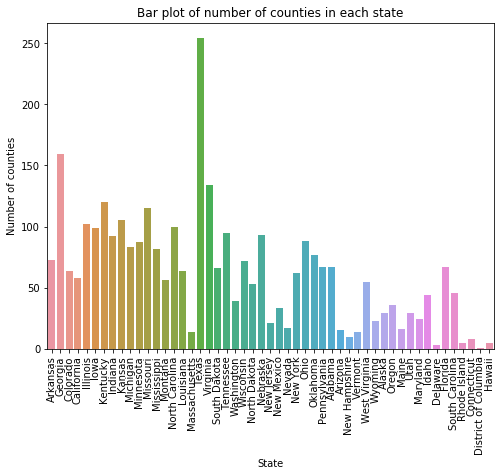

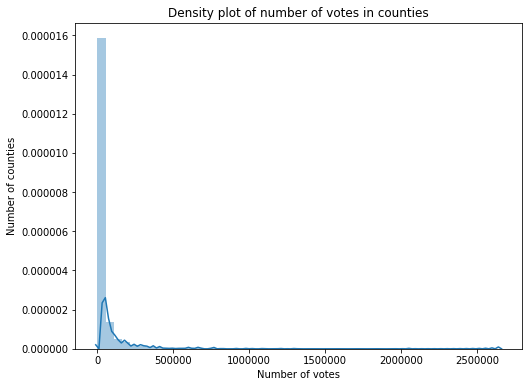

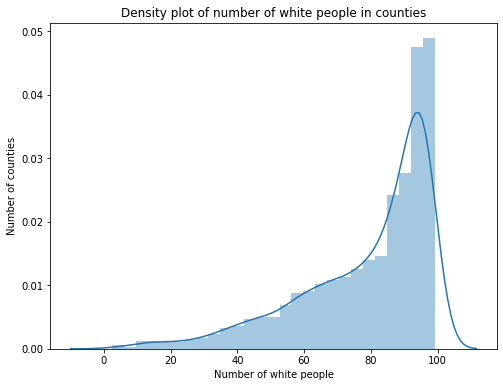

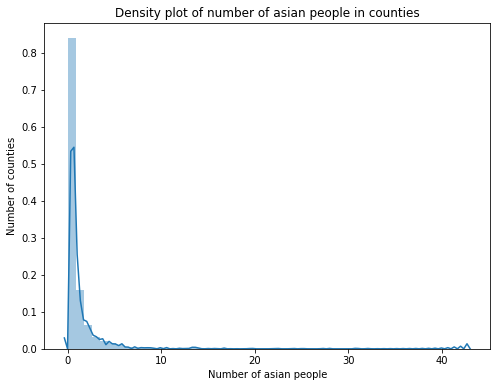

<Figure size 576x432 with 0 Axes>

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=(8.0, 6.0)
import matplotlib.gridspec as gridspec
import seaborn as sns

shape = (3,2)

#plt.subplot2grid(shape, (0,0), 1, 2)
sns.countplot(df_data['State'])
plt.title('Bar plot of number of counties in each state')
plt.xlabel('State')
plt.ylabel('Number of counties')
plt.xticks(rotation = 90)
plt.show()

#plt.subplot2grid(shape,(0,1))
sns.distplot(df_data['Votes'])
plt.title('Density plot of number of votes in counties')
plt.xlabel('Number of votes')
plt.ylabel('Number of counties')
plt.show()


sns.distplot(df_data['White'])
plt.title('Density plot of number of white people in counties')
plt.xlabel('Number of white people')
plt.ylabel('Number of counties')
plt.show()

sns.distplot(df_data['Asian'])
plt.title('Density plot of number of asian people in counties')
plt.xlabel('Number of asian people')
plt.ylabel('Number of counties')
plt.show()
plt.tight_layout()